In [15]:
import numpy as np
import pandas as pd
import sklearn as sk
import statsmodels.api as sm

significant_cnt1 = 0
significant_cnt2 = 0
for i in range(1000):
    tau_1 = 0.001
    tau_2 = 10
    Z = np.random.normal(loc = 0,scale= 1,size=500)
    epsilon = np.random.normal(loc=0,scale= 1, size= 500)
    X = Z**5
    A_1 = X.copy()
    A_2 = X.copy()
    A_1[A_1>tau_1] = 0
    A_1[A_1<-tau_1] = 0
    A_1[A_1!=0] = 1

    A_2[A_2>tau_2] = 0
    A_2[A_2<-tau_2] = 0
    A_2[A_2!=0] = 1
    Y_1 = 1 + A_1 + X + 0.5*A_1*X + epsilon
    Y_2 = 1 + A_2 + X + 0.5*A_2*X + epsilon
    predictors_1 = np.matrix([np.ones(500),A_1,X,A_1*X]).T 

    predictors_2 = np.matrix([np.ones(500),A_2,X,A_2*X]).T 


    lm_1 = sm.OLS(Y_1,predictors_1)
    lm_2 = sm.OLS(Y_2,predictors_2)
    results_1 = lm_1.fit()
    results_2 = lm_2.fit()

    if results_1.pvalues[3] < 0.05:
        significant_cnt1 += 1

    if results_2.pvalues[3] < 0.05:
        significant_cnt2 += 1

significant_rate_1 = significant_cnt1/1000
print("The proportion of the datasets that p-value for beta_3 (tau=0.01) is significant: {:.4f} %".format(100 * significant_rate_1))

significant_rate_2 = significant_cnt2/1000
print("The proportion of the datasets that p-value for beta_3 (tau=0.025) is significant: {:.4f} %".format(100 * significant_rate_2))


The proportion of the datasets that p-value for beta_3 (tau=0.01) is significant: 5.8000 %
The proportion of the datasets that p-value for beta_3 (tau=0.025) is significant: 100.0000 %


In [16]:
tau_1 = 0.001
tau_2 = 10
Z = np.random.normal(loc = 0,scale= 1,size=500)
epsilon = np.random.normal(loc=0,scale= 1, size= 500)
X = Z**5
A_1 = X.copy()
A_2 = X.copy()
A_1[A_1>tau_1] = 0
A_1[A_1<-tau_1] = 0
A_1[A_1!=0] = 1

A_2[A_2>tau_2] = 0
A_2[A_2<-tau_2] = 0
A_2[A_2!=0] = 1
Y_1 = 1 + A_1 + X + 0.5*A_1*X + epsilon
Y_2 = 1 + A_2 + X + 0.5*A_2*X + epsilon
predictors_1 = np.matrix([np.ones(500),A_1,X,A_1*X]).T 

predictors_1

matrix([[ 1.00000000e+00,  0.00000000e+00, -6.73956454e+00,
         -0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00, -1.69356160e-02,
         -0.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  4.22348377e-05,
          4.22348377e-05],
        ...,
        [ 1.00000000e+00,  0.00000000e+00, -5.85121326e+00,
         -0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00, -1.05157905e-03,
         -0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00, -9.56372707e-01,
         -0.00000000e+00]])

In [23]:
import numpy as np
from scipy.stats import norm
from statsmodels.api import OLS

np.random.seed(123)

n = 500
n_sim = 1000

tau1 = 0.01
tau2 = 10

beta0 = 1
beta1 = 1
beta2 = 1
beta3 = 0.5

p_vals1 = np.zeros(n_sim)
p_vals2 = np.zeros(n_sim)

for i in range(n_sim):
    x = norm.rvs(0, 1, n)
    a1 = np.where(abs(x) > tau1, 1, 0)
    a2 = np.where(abs(x) > tau2, 1, 0)
    y1 = beta0 + beta1*a1 + beta2*x + beta3*a1*x + norm.rvs(0, 1, n)
    y2 = beta0 + beta1*a2 + beta2*x + beta3*a2*x + norm.rvs(0, 1, n)
    X1 = np.column_stack((np.ones(n), x, a1, a1*x))
    X2 = np.column_stack((np.ones(n), x, a2, a2*x))
    fit1 = OLS(y1, X1).fit()
    fit2 = OLS(y2, X2).fit()
    p_vals1[i] = fit1.pvalues[3]
    p_vals2[i] = fit2.pvalues[3]

print(np.mean(p_vals1 < 0.05))  # proportion of significant p-values for tau=0.01
print(np.mean(p_vals2 < 0.05))  # proportion of significant p-values for tau=0.025


0.136
0.0


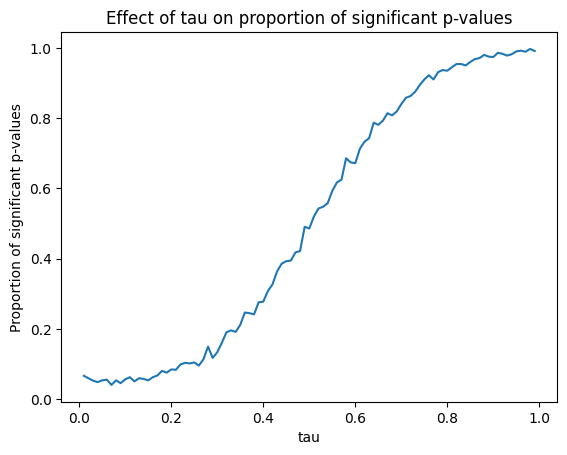

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.api import OLS

np.random.seed(123)

n = 500
n_sim = 1000

beta0 = 1
beta1 = 1
beta2 = 1
beta3 = 0.5

tau_range = np.arange(0.01, 1, 0.01)
prop_sig = np.zeros(len(tau_range))

for i, tau in enumerate(tau_range):
    p_vals = np.zeros(n_sim)
    for j in range(n_sim):
        x = norm.rvs(0, 1, n)
        a = np.where(abs(x) > tau, 0, 1)
        y = beta0 + beta1*a + beta2*x + beta3*a*x + norm.rvs(0, 1, n)
        X = np.column_stack((np.ones(n), x, a, a*x))
        fit = OLS(y, X).fit()
        p_vals[j] = fit.pvalues[3]
    prop_sig[i] = np.mean(p_vals < 0.05)

plt.plot(tau_range, prop_sig)
plt.xlabel('tau')
plt.ylabel('Proportion of significant p-values')
plt.title('Effect of tau on proportion of significant p-values')
plt.show()


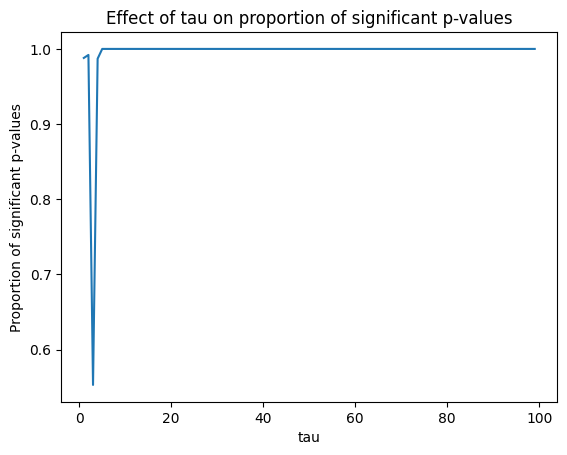

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.api import OLS

np.random.seed(123)

n = 500
n_sim = 1000

beta0 = 1
beta1 = 1
beta2 = 1
beta3 = 0.5

tau_range = np.arange(1, 100, 1)
prop_sig = np.zeros(len(tau_range))

for i, tau in enumerate(tau_range):
    p_vals = np.zeros(n_sim)
    for j in range(n_sim):
        x = norm.rvs(0, 1, n)
        a = np.where(abs(x) > tau, 0, 1)
        y = beta0 + beta1*a + beta2*x + beta3*a*x + norm.rvs(0, 1, n)
        X = np.column_stack((np.ones(n), x, a, a*x))
        fit = OLS(y, X).fit()
        p_vals[j] = fit.pvalues[3]
    prop_sig[i] = np.mean(p_vals < 0.05)

plt.plot(tau_range, prop_sig)
plt.xlabel('tau')
plt.ylabel('Proportion of significant p-values')
plt.title('Effect of tau on proportion of significant p-values')
plt.show()


In [27]:
import numpy as np
from scipy.stats import norm
from statsmodels.api import OLS

np.random.seed(123)

n = 500
n_sim = 1000

beta0 = 1
beta1 = 1
beta2 = 1
beta3 = 0.5

tau = 0.01
n500del1_pvalue = np.zeros(n_sim)

for i in range(n_sim):
    x = norm.rvs(0, 1, n)
    a = np.where(abs(x) <= tau, 1, 0)
    y = beta0 + beta1*a + beta2*x + beta3*a*x + norm.rvs(0, 1, n)
    X = np.column_stack((np.ones(n), x, a, a*x))
    fit = OLS(y, X).fit()
    n500del1_pvalue[i] = fit.pvalues[3]

print(np.mean(n500del1_pvalue <= 0.05))

tau = 0.025
n500del1_pvalue = np.zeros(n_sim)

for i in range(n_sim):
    x = norm.rvs(0, 1, n)
    a = np.where(abs(x) <= tau, 1, 0)
    y = beta0 + beta1*a + beta2*x + beta3*a*x + norm.rvs(0, 1, n)
    X = np.column_stack((np.ones(n), x, a, a*x))
    fit = OLS(y, X).fit()
    n500del1_pvalue[i] = fit.pvalues[3]

print(np.mean(n500del1_pvalue <= 0.05))


0.067
0.048
